In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import math
import missingno

In [2]:
df = pd.DataFrame([10,20,30,40], columns=['numbers'], index=['a','b','c','d'])
print(df)
df

   numbers
a       10
b       20
c       30
d       40


,numbers
a,10
b,20
c,30
d,40


In [3]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [4]:
df.columns

Index(['numbers'], dtype='object')

In [5]:
df.loc['c']

numbers    30
Name: c, dtype: int64

In [6]:
df.loc[['a','c']]

,numbers
a,10
c,30


In [7]:
df.index[1:3]

Index(['b', 'c'], dtype='object')

In [8]:
df.loc[df.index[1:3]]

,numbers
b,20
c,30


In [9]:
df.sum()

numbers    100
dtype: int64

In [10]:
df.apply(lambda x : x ** 2)

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df ** 2

,numbers
a,100
b,400
c,900
d,1600


In [12]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [14]:
df['names'] = pd.DataFrame(['Yves','Guido','Felix','Frances'], index=['d','a','b','c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Frances
d,40,4.5,Yves


In [15]:
df = df.append(pd.DataFrame({'numbers':[100,200], 'floats':[5.75,7.77], 'names':['Henry','Jorge']}, index=['x','z']))
df

,numbers,floats,names
a,10,1.50,Guido
b,20,2.50,Felix
c,30,3.50,Frances
d,40,4.50,Yves
x,100,5.75,Henry
z,200,7.77,Jorge


In [16]:
df.join(pd.DataFrame([1, 4, 9, 16, 25], index=['a','b','c','d', 'y'], columns=['squares']))

,numbers,floats,names,squares
a,10,1.50,Guido,1.0
b,20,2.50,Felix,4.0
c,30,3.50,Frances,9.0
d,40,4.50,Yves,16.0
x,100,5.75,Henry,NaN
z,200,7.77,Jorge,NaN


In [17]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25], index=['a','b','c','d', 'y'], columns=['squares']), how='outer')
df

,numbers,floats,names,squares
a,10.0,1.50,Guido,1.0
b,20.0,2.50,Felix,4.0
c,30.0,3.50,Frances,9.0
d,40.0,4.50,Yves,16.0
x,100.0,5.75,Henry,NaN
y,NaN,NaN,NaN,25.0
z,200.0,7.77,Jorge,NaN


In [18]:
df[['numbers','squares']].sum()

numbers    400.0
squares     55.0
dtype: float64

In [19]:
df[['numbers','squares']].std()

numbers    72.571804
squares     9.669540
dtype: float64

In [20]:
a = np.random.standard_normal((9,4))
a

array([[ 1.12991999,  0.4827153 ,  1.52005245,  0.73103433],
       [ 0.4118599 , -0.044197  , -0.16466767, -0.18408398],
       [-0.22066598,  1.07673704,  0.51742761, -0.23447002],
       [-0.09472715,  0.23570642, -0.51930922, -1.88302905],
       [-0.11833416, -1.90375232, -0.76681284,  0.292291  ],
       [ 0.47910544,  1.36210359,  0.86756988,  0.69922606],
       [ 0.21657583,  2.07987192, -0.33447698,  1.61817962],
       [-0.84247293, -0.30940649, -2.55553178, -0.04282431],
       [ 0.44603404,  0.47752615,  0.36500962,  0.75553122]])

In [21]:
a.round(6)

array([[ 1.12992 ,  0.482715,  1.520052,  0.731034],
       [ 0.41186 , -0.044197, -0.164668, -0.184084],
       [-0.220666,  1.076737,  0.517428, -0.23447 ],
       [-0.094727,  0.235706, -0.519309, -1.883029],
       [-0.118334, -1.903752, -0.766813,  0.292291],
       [ 0.479105,  1.362104,  0.86757 ,  0.699226],
       [ 0.216576,  2.079872, -0.334477,  1.61818 ],
       [-0.842473, -0.309406, -2.555532, -0.042824],
       [ 0.446034,  0.477526,  0.36501 ,  0.755531]])

In [22]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,1.129920,0.482715,1.520052,0.731034
1,0.411860,-0.044197,-0.164668,-0.184084
2,-0.220666,1.076737,0.517428,-0.234470
3,-0.094727,0.235706,-0.519309,-1.883029
4,-0.118334,-1.903752,-0.766813,0.292291
5,0.479105,1.362104,0.867570,0.699226
6,0.216576,2.079872,-0.334477,1.618180
7,-0.842473,-0.309406,-2.555532,-0.042824
8,0.446034,0.477526,0.365010,0.755531


In [23]:
df.columns=[['No1','No2','No3','No4']]
df.reset_index()
df

,No1,No2,No3,No4
0,1.129920,0.482715,1.520052,0.731034
1,0.411860,-0.044197,-0.164668,-0.184084
2,-0.220666,1.076737,0.517428,-0.234470
3,-0.094727,0.235706,-0.519309,-1.883029
4,-0.118334,-1.903752,-0.766813,0.292291
5,0.479105,1.362104,0.867570,0.699226
6,0.216576,2.079872,-0.334477,1.618180
7,-0.842473,-0.309406,-2.555532,-0.042824
8,0.446034,0.477526,0.365010,0.755531


In [24]:
df.loc[7]

No1   -0.842473
No2   -0.309406
No3   -2.555532
No4   -0.042824
Name: 7, dtype: float64

In [25]:
df.loc[7].No1

No1   -0.842473
Name: 7, dtype: float64

In [26]:
df.loc[7]['No1',]

-0.8424729340389497

In [27]:
df[['No1','No4']]

,No1,No4
0,1.129920,0.731034
1,0.411860,-0.184084
2,-0.220666,-0.234470
3,-0.094727,-1.883029
4,-0.118334,0.292291
5,0.479105,0.699226
6,0.216576,1.618180
7,-0.842473,-0.042824
8,0.446034,0.755531


In [28]:
df.loc[0,'No1']

No1    1.12992
Name: 0, dtype: float64

In [29]:
df.loc[:,'No1':'No3']

,No1,No2,No3
0,1.129920,0.482715,1.520052
1,0.411860,-0.044197,-0.164668
2,-0.220666,1.076737,0.517428
3,-0.094727,0.235706,-0.519309
4,-0.118334,-1.903752,-0.766813
5,0.479105,1.362104,0.867570
6,0.216576,2.079872,-0.334477
7,-0.842473,-0.309406,-2.555532
8,0.446034,0.477526,0.365010


In [30]:
df.loc[3:7,'No1':'No3']

,No1,No2,No3
3,-0.094727,0.235706,-0.519309
4,-0.118334,-1.903752,-0.766813
5,0.479105,1.362104,0.867570
6,0.216576,2.079872,-0.334477
7,-0.842473,-0.309406,-2.555532


In [31]:
dates = pd.date_range(start='2019-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

In [32]:
df.index = dates
df

,No1,No2,No3,No4
2019-01-31,1.129920,0.482715,1.520052,0.731034
2019-02-28,0.411860,-0.044197,-0.164668,-0.184084
2019-03-31,-0.220666,1.076737,0.517428,-0.234470
2019-04-30,-0.094727,0.235706,-0.519309,-1.883029
2019-05-31,-0.118334,-1.903752,-0.766813,0.292291
2019-06-30,0.479105,1.362104,0.867570,0.699226
2019-07-31,0.216576,2.079872,-0.334477,1.618180
2019-08-31,-0.842473,-0.309406,-2.555532,-0.042824
2019-09-30,0.446034,0.477526,0.365010,0.755531


In [33]:
np.array(df).round(6)

array([[ 1.12992 ,  0.482715,  1.520052,  0.731034],
       [ 0.41186 , -0.044197, -0.164668, -0.184084],
       [-0.220666,  1.076737,  0.517428, -0.23447 ],
       [-0.094727,  0.235706, -0.519309, -1.883029],
       [-0.118334, -1.903752, -0.766813,  0.292291],
       [ 0.479105,  1.362104,  0.86757 ,  0.699226],
       [ 0.216576,  2.079872, -0.334477,  1.61818 ],
       [-0.842473, -0.309406, -2.555532, -0.042824],
       [ 0.446034,  0.477526,  0.36501 ,  0.755531]])

In [34]:
df.sum()

No1    1.407295
No2    3.457305
No3   -1.070739
No4    1.751855
dtype: float64

In [35]:
df.mean()

No1    0.156366
No2    0.384145
No3   -0.118971
No4    0.194651
dtype: float64

In [36]:
df.std()

No1    0.557126
No2    1.131979
No3    1.165345
No4    0.974268
dtype: float64

In [37]:
df.cumsum()

,No1,No2,No3,No4
2019-01-31,1.129920,0.482715,1.520052,0.731034
2019-02-28,1.541780,0.438518,1.355385,0.546950
2019-03-31,1.321114,1.515255,1.872812,0.312480
2019-04-30,1.226387,1.750962,1.353503,-1.570549
2019-05-31,1.108053,-0.152791,0.586690,-1.278258
2019-06-30,1.587158,1.209313,1.454260,-0.579032
2019-07-31,1.803734,3.289185,1.119783,1.039148
2019-08-31,0.961261,2.979778,-1.435749,0.996324
2019-09-30,1.407295,3.457305,-1.070739,1.751855


In [38]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.156366,0.384145,-0.118971,0.194651
std,0.557126,1.131979,1.165345,0.974268
min,-0.842473,-1.903752,-2.555532,-1.883029
25%,-0.118334,-0.044197,-0.519309,-0.184084
50%,0.216576,0.477526,-0.164668,0.292291
75%,0.446034,1.076737,0.517428,0.731034
max,1.129920,2.079872,1.520052,1.618180


In [39]:
np.sqrt(df)

/Users/leejunho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,No1,No2,No3,No4
2019-01-31,1.062977,0.694777,1.232904,0.855005
2019-02-28,0.641763,NaN,NaN,NaN
2019-03-31,NaN,1.037659,0.719324,NaN
2019-04-30,NaN,0.485496,NaN,NaN
2019-05-31,NaN,NaN,NaN,0.540639
2019-06-30,0.692174,1.167092,0.931434,0.836197
2019-07-31,0.465377,1.442176,NaN,1.272077
2019-08-31,NaN,NaN,NaN,NaN
2019-09-30,0.667858,0.691033,0.604160,0.869213


In [40]:
np.sqrt(df).sum()

/Users/leejunho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


No1    3.530149
No2    5.518233
No3    3.487823
No4    4.373132
dtype: float64

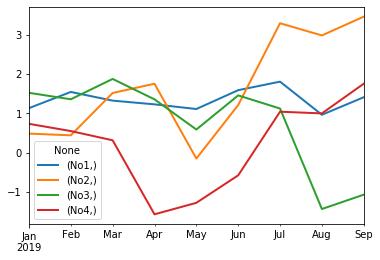

In [41]:
%matplotlib inline
df.cumsum().plot(lw=2.0)

In [42]:
df['No1',]

2019-01-31    1.129920
2019-02-28    0.411860
2019-03-31   -0.220666
2019-04-30   -0.094727
2019-05-31   -0.118334
2019-06-30    0.479105
2019-07-31    0.216576
2019-08-31   -0.842473
2019-09-30    0.446034
Freq: M, Name: (No1,), dtype: float64

In [43]:
df.iloc[1:3,1:3]

,No2,No3
2019-02-28,-0.044197,-0.164668
2019-03-31,1.076737,0.517428


In [44]:
df.loc[df.index[0:3],'No2':'No4']

,No2,No3,No4
2019-01-31,0.482715,1.520052,0.731034
2019-02-28,-0.044197,-0.164668,-0.184084
2019-03-31,1.076737,0.517428,-0.234470


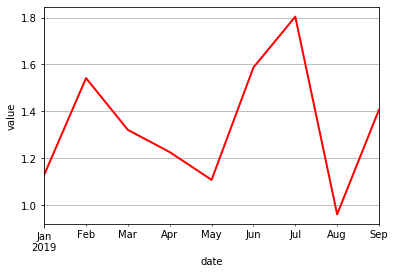

In [45]:
df.iloc[:,0].cumsum().plot(style='r', lw=2.0)
plt.xlabel('date')
plt.ylabel('value')
plt.grid(True)

In [46]:
df['Quarter',] = ['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3']
df

,No1,No2,No3,No4,Quarter
2019-01-31,1.129920,0.482715,1.520052,0.731034,Q1
2019-02-28,0.411860,-0.044197,-0.164668,-0.184084,Q1
2019-03-31,-0.220666,1.076737,0.517428,-0.234470,Q1
2019-04-30,-0.094727,0.235706,-0.519309,-1.883029,Q2
2019-05-31,-0.118334,-1.903752,-0.766813,0.292291,Q2
2019-06-30,0.479105,1.362104,0.867570,0.699226,Q2
2019-07-31,0.216576,2.079872,-0.334477,1.618180,Q3
2019-08-31,-0.842473,-0.309406,-2.555532,-0.042824,Q3
2019-09-30,0.446034,0.477526,0.365010,0.755531,Q3


In [47]:
print(type(df['Quarter',]))
df['Quarter',]

<class 'pandas.core.series.Series'>


2019-01-31    Q1
2019-02-28    Q1
2019-03-31    Q1
2019-04-30    Q2
2019-05-31    Q2
2019-06-30    Q2
2019-07-31    Q3
2019-08-31    Q3
2019-09-30    Q3
Freq: M, Name: (Quarter,), dtype: object

In [63]:
groups = df.groupby(df['Quarter',])
groups.mean()

,No1,No2,No3,No4
"(Quarter,)",,,,
Q1,0.440371,0.505085,0.624271,0.104160
Q2,0.088681,-0.101981,-0.139517,-0.297171
Q3,-0.059954,0.749331,-0.841666,0.776962


In [49]:
groups.max()

,No1,No2,No3,No4
"(Quarter,)",,,,
Q1,1.129920,1.076737,1.520052,0.731034
Q2,0.479105,1.362104,0.867570,0.699226
Q3,0.446034,2.079872,0.365010,1.618180


In [50]:
groups.size()

(Quarter,)
Q1    3
Q2    3
Q3    3
dtype: int64

In [51]:
df['Odd_Even',] = ['Odd','Even','Odd','Even','Odd','Even','Odd','Even','Odd']
df

,No1,No2,No3,No4,Quarter,Odd_Even
2019-01-31,1.129920,0.482715,1.520052,0.731034,Q1,Odd
2019-02-28,0.411860,-0.044197,-0.164668,-0.184084,Q1,Even
2019-03-31,-0.220666,1.076737,0.517428,-0.234470,Q1,Odd
2019-04-30,-0.094727,0.235706,-0.519309,-1.883029,Q2,Even
2019-05-31,-0.118334,-1.903752,-0.766813,0.292291,Q2,Odd
2019-06-30,0.479105,1.362104,0.867570,0.699226,Q2,Even
2019-07-31,0.216576,2.079872,-0.334477,1.618180,Q3,Odd
2019-08-31,-0.842473,-0.309406,-2.555532,-0.042824,Q3,Even
2019-09-30,0.446034,0.477526,0.365010,0.755531,Q3,Odd


In [52]:
groups = df.groupby([df['Quarter',], df['Odd_Even',]])
[df['Quarter',], df['Odd_Even',]]

[2019-01-31    Q1
 2019-02-28    Q1
 2019-03-31    Q1
 2019-04-30    Q2
 2019-05-31    Q2
 2019-06-30    Q2
 2019-07-31    Q3
 2019-08-31    Q3
 2019-09-30    Q3
 Freq: M, Name: (Quarter,), dtype: object, 2019-01-31     Odd
 2019-02-28    Even
 2019-03-31     Odd
 2019-04-30    Even
 2019-05-31     Odd
 2019-06-30    Even
 2019-07-31     Odd
 2019-08-31    Even
 2019-09-30     Odd
 Freq: M, Name: (Odd_Even,), dtype: object]

In [53]:
groups.size()

(Quarter,)  (Odd_Even,)
Q1          Even           1
            Odd            2
Q2          Even           2
            Odd            1
Q3          Even           1
            Odd            2
dtype: int64

In [54]:
groups.mean()

No1       No2       No3       No4
(Quarter,) (Odd_Even,)                                        
Q1         Even         0.411860 -0.044197 -0.164668 -0.184084
           Odd          0.454627  0.779726  1.018740  0.248282
Q2         Even         0.192189  0.798905  0.174130 -0.591901
           Odd         -0.118334 -1.903752 -0.766813  0.292291
Q3         Even        -0.842473 -0.309406 -2.555532 -0.042824
           Odd          0.331305  1.278699  0.015266  1.186855

In [55]:
testDF = groups.mean().unstack()
testDF

No1                 No2                 No3            \
('Odd_Even',)      Even       Odd      Even       Odd      Even       Odd   
(Quarter,)                                                                  
Q1             0.411860  0.454627 -0.044197  0.779726 -0.164668  1.018740   
Q2             0.192189 -0.118334  0.798905 -1.903752  0.174130 -0.766813   
Q3            -0.842473  0.331305 -0.309406  1.278699 -2.555532  0.015266   

                    No4            
('Odd_Even',)      Even       Odd  
(Quarter,)                         
Q1            -0.184084  0.248282  
Q2            -0.591901  0.292291  
Q3            -0.042824  1.186855

In [56]:
print(testDF.columns)
print(testDF.index)

MultiIndex([('No1', 'Even'),
            ('No1',  'Odd'),
            ('No2', 'Even'),
            ('No2',  'Odd'),
            ('No3', 'Even'),
            ('No3',  'Odd'),
            ('No4', 'Even'),
            ('No4',  'Odd')],
           names=[None, ('Odd_Even',)])
Index(['Q1', 'Q2', 'Q3'], dtype='object', name=('Quarter',))


In [60]:
DAX = web.DataReader(name="^GDAXI", data_source="yahoo", start = '2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5074 entries, 2000-01-03 to 2020-01-02
Data columns (total 6 columns):
High         5074 non-null float64
Low          5074 non-null float64
Open         5074 non-null float64
Close        5074 non-null float64
Volume       5074 non-null float64
Adj Close    5074 non-null float64
dtypes: float64(6)
memory usage: 277.5 KB


In [69]:
print(DAX.columns)
DAX.tail()

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-20,13324.110352,13201.799805,13210.259766,13318.900391,170723200.0,13318.900391
2019-12-23,13331.860352,13285.549805,13304.769531,13300.980469,56215400.0,13300.980469
2019-12-27,13381.440430,13311.519531,13338.320312,13337.110352,43758600.0,13337.110352
2019-12-30,13316.620117,13244.169922,13301.429688,13249.009766,31427400.0,13249.009766
2020-01-02,13425.030273,13225.160156,13233.709961,13385.929688,0.0,13385.929688


In [80]:
print(type(DAX['Close']))
DAX['Close']

<class 'pandas.core.series.Series'>


Date
2000-01-03     6750.759766
2000-01-04     6586.950195
2000-01-05     6502.069824
2000-01-06     6474.919922
2000-01-07     6780.959961
                  ...     
2019-12-20    13318.900391
2019-12-23    13300.980469
2019-12-27    13337.110352
2019-12-30    13249.009766
2020-01-02    13385.929688
Name: Close, Length: 5074, dtype: float64

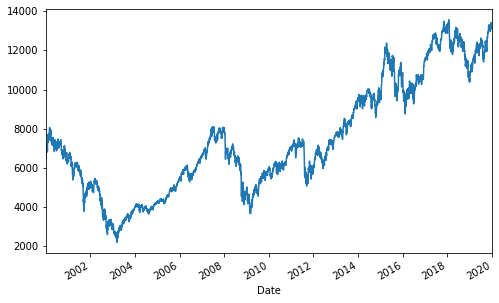

In [74]:
DAX['Close'].plot(figsize=(8,5))

In [79]:
DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))
DAX[['Close','Return']].tail(8)

,Close,Return
Date,,
2019-12-17,13287.830078,-0.008978
2019-12-18,13222.160156,-0.004954
2019-12-19,13211.959961,-0.000772
2019-12-20,13318.900391,0.008062
2019-12-23,13300.980469,-0.001346
2019-12-27,13337.110352,0.002713
2019-12-30,13249.009766,-0.006628
2020-01-02,13385.929688,0.010281


array([<matplotlib.axes._subplots.AxesSubplot object at 0x125606e90>,
      dtype=object)

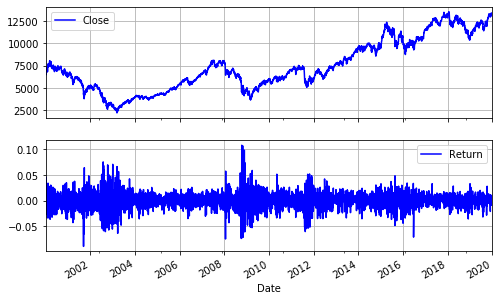

In [88]:
DAX[['Close','Return']].plot(subplots=True, style='b', figsize=(8,5), grid=True)

(1) **_변동성 군집현상_** : 변동성은 시간에 따라 일정하게 유지 되지 않음. 높게 혹은 낮게 유지되는 기간 존재 <br>
(2) **_레버리지 효과_** : 일반적으로 변동성과 주식 시장 수익률은 음의 상관관계 가짐 

In [103]:
DAX['42d'] = DAX['Close'].rolling(42).mean()
DAX['252d'] = DAX['Close'].rolling(252).mean()
DAX[['Close','42d', '252d']]

,Close,42d,252d
Date,,,
2000-01-03,6750.759766,NaN,NaN
2000-01-04,6586.950195,NaN,NaN
2000-01-05,6502.069824,NaN,NaN
2000-01-06,6474.919922,NaN,NaN
2000-01-07,6780.959961,NaN,NaN
...,...,...,...
2019-12-20,13318.900391,13148.434291,12069.739025
2019-12-23,13300.980469,13158.645740,12080.413156
2019-12-27,13337.110352,13169.183850,12091.140497


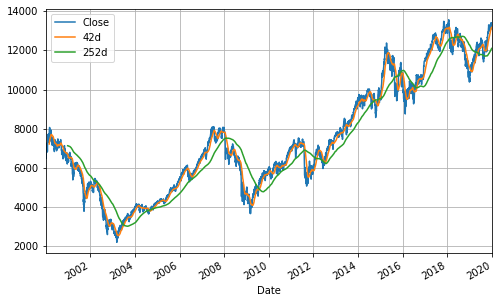

In [214]:
DAX[['Close','42d','252d']].plot(figsize=(8,5), grid=True)

**_이동 평균선_**

In [109]:
DAX['Mov_Vol'] = DAX['Return'].rolling(252).std() * math.sqrt(252)
DAX.tail(8)

,High,Low,Open,Close,Volume,Adj Close,Return,42d,252d,Mov_Vol
Date,,,,,,,,,,
2019-12-17,13394.469727,13269.429688,13391.269531,13287.830078,79260500.0,13287.830078,-0.008978,13113.858584,12040.081403,0.143532
2019-12-18,13286.000000,13215.879883,13266.349609,13222.160156,71001000.0,13222.160156,-0.004954,13125.149065,12049.803467,0.143335
2019-12-19,13248.980469,13140.219727,13226.700195,13211.959961,84018200.0,13211.959961,-0.000772,13136.036435,12059.609301,0.143295
2019-12-20,13324.110352,13201.799805,13210.259766,13318.900391,170723200.0,13318.900391,0.008062,13148.434291,12069.739025,0.143470
2019-12-23,13331.860352,13285.549805,13304.769531,13300.980469,56215400.0,13300.980469,-0.001346,13158.645740,12080.413156,0.142657
2019-12-27,13381.440430,13311.519531,13338.320312,13337.110352,43758600.0,13337.110352,0.002713,13169.183850,12091.140497,0.142663
2019-12-30,13316.620117,13244.169922,13301.429688,13249.009766,31427400.0,13249.009766,-0.006628,13176.500512,12102.519465,0.140660
2020-01-02,13425.030273,13225.160156,13233.709961,13385.929688,0.0,13385.929688,0.010281,13187.126930,12113.737599,0.140057


array([<matplotlib.axes._subplots.AxesSubplot object at 0x123ad1650>,
      dtype=object)

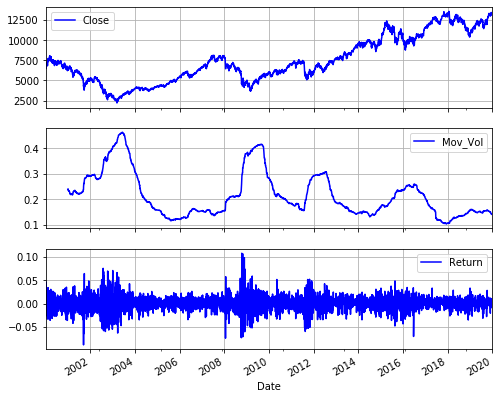

In [108]:
DAX[['Close','Mov_Vol','Return']].plot(subplots=True, style='b', figsize=(8,7), grid=True)

Mov_Vol : 이동 역사성 변동성<br>
이동 역사적 변동성이 시장이 하락하면서 증가하고, 시장이 상승할 때는 감소하는 경향을 보임 -> 레버리지 효과 뒷받침함

In [114]:
from urllib.request import urlretrieve
es_url = "http://www.stoxx.com/download/historical_values/hbrbcpe.txt"
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')
!ls ./data/*txt

./data/es.txt ./data/vs.txt


In [122]:
lines = open('./data/es.txt','r').readlines()
print(lines[:10])
lines = [line.replace(" ",'') for line in lines]
lines[:10]

['Price Indices - EURO Currency\n', 'Date    ;Blue-Chip;Blue-Chip;Broad    ; Broad   ;Ex UK    ;Ex Euro Zone;Blue-Chip; Broad\n', '        ;  Europe ;Euro-Zone;Europe   ;Euro-Zone;         ;            ; Nordic  ; Nordic\n', '        ;  SX5P   ;  SX5E   ;SXXP     ;SXXE     ; SXXF    ;    SXXA    ;    DK5F ; DKXF\n', '31.12.1986;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56\n', '01.01.1987;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56\n', '02.01.1987;770.89 ;  891.78 ;   82.57 ;   97.80 ;   97.43 ;   69.37 ;  647.62  ;  65.81\n', '05.01.1987;771.89 ;  898.33 ;   82.82 ;   98.60 ;   98.19 ;   69.16 ;  649.94  ;  65.82\n', '06.01.1987;775.92 ;  902.32 ;   83.28 ;   99.19 ;   98.83 ;   69.50 ;  652.49  ;  66.06\n', '07.01.1987;781.21 ;  899.15 ;   83.78 ;   98.96 ;   98.62 ;   70.59 ;  651.97  ;  66.20\n']


['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n',
 '06.01.1987;775.92;902.32;83.28;99.19;98.83;69.50;652.49;66.06\n',
 '07.01.1987;781.21;899.15;83.78;98.96;98.62;70.59;651.97;66.20\n']

In [124]:
for line in lines[3883:3890]:
    print(line[41:])  ## should remove semi-colon

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



In [132]:
# create reorganized txt file
new_file = open('./data/es50.txt','w')
new_file.writelines('date' + lines[3][:-1] + ';DEL' + lines[3][-1])
new_file.writelines(lines[4:])
new_file.close()

In [134]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [149]:
es = pd.read_csv('./data/es50.txt', index_col=0, parse_dates=True,
                sep=';', dayfirst=True)
print(es.tail(3))
del es['DEL']
print(es.info())
es.head()

               SX5P     SX5E    SXXP    SXXE    SXXF    SXXA     DK5F    DKXF  \
date                                                                            
2016-09-30  2843.17  3002.24  342.92  325.31  408.27  350.09  9115.81  583.26   
2016-10-03  2845.43  2998.50  343.23  325.08  408.44  350.92  9131.24  584.32   
2016-10-04  2871.06  3029.50  346.10  327.73  411.41  353.92  9212.05  588.71   

            DEL  
date             
2016-09-30  NaN  
2016-10-03  NaN  
2016-10-04  NaN  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB
None


,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
date,,,,,,,,
1986-12-31,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-01,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-02,770.89,891.78,82.57,97.80,97.43,69.37,647.62,65.81
1987-01-05,771.89,898.33,82.82,98.60,98.19,69.16,649.94,65.82
1987-01-06,775.92,902.32,83.28,99.19,98.83,69.50,652.49,66.06


In [157]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2, parse_dates=True, sep=',', dayfirst=True)
print(vs.info())
vs.tail(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB
None


,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
2016-02-08,33.3917,34.7251,33.2189,31.8308,31.4783,30.6941,30.3705,29.8478,29.2559
2016-02-09,33.9664,35.7884,33.7800,32.6220,32.2459,31.5572,31.1659,30.5339,29.9000
2016-02-10,33.4528,34.6020,33.3637,32.1438,32.0018,31.2099,30.9937,30.8174,30.2533
2016-02-11,38.3051,41.2095,38.1347,35.8676,35.1073,33.7847,33.4126,32.2234,31.2124
2016-02-12,35.6846,35.3849,35.6965,34.1404,33.8645,32.9590,32.8208,32.3189,31.8194


In [174]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX':es['SX5E'][es.index >= dt.datetime(1999,1,4)]})
data = data.join(pd.DataFrame({'VSTOXX':vs['V2TX'][vs.index >= dt.datetime(1999,1,4)]}))
data = data[data.index <= '2016-02-12']
data

,EUROSTOXX,VSTOXX
date,,
1999-01-04,3543.10,18.2033
1999-01-05,3604.67,29.6912
1999-01-06,3685.36,25.1670
1999-01-07,3627.87,32.5205
1999-01-08,3616.57,33.2296
...,...,...
2016-02-08,2785.17,33.3917
2016-02-09,2736.50,33.9664
2016-02-10,2789.05,33.4528


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4387 entries, 1999-01-04 to 2016-02-12
Data columns (total 2 columns):
EUROSTOXX    4387 non-null float64
VSTOXX       4356 non-null float64
dtypes: float64(2)
memory usage: 102.8 KB


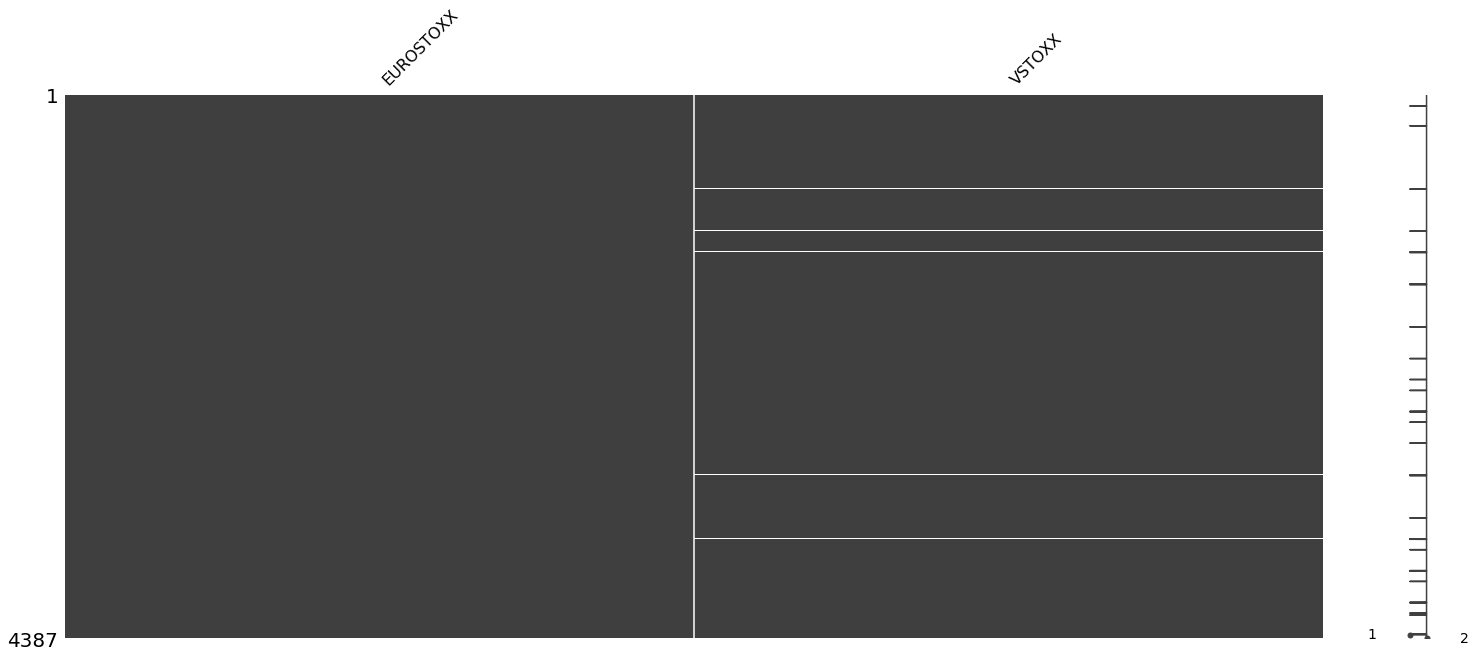

In [175]:
missingno.matrix(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4387 entries, 1999-01-04 to 2016-02-12
Data columns (total 2 columns):
EUROSTOXX    4387 non-null float64
VSTOXX       4387 non-null float64
dtypes: float64(2)
memory usage: 102.8 KB


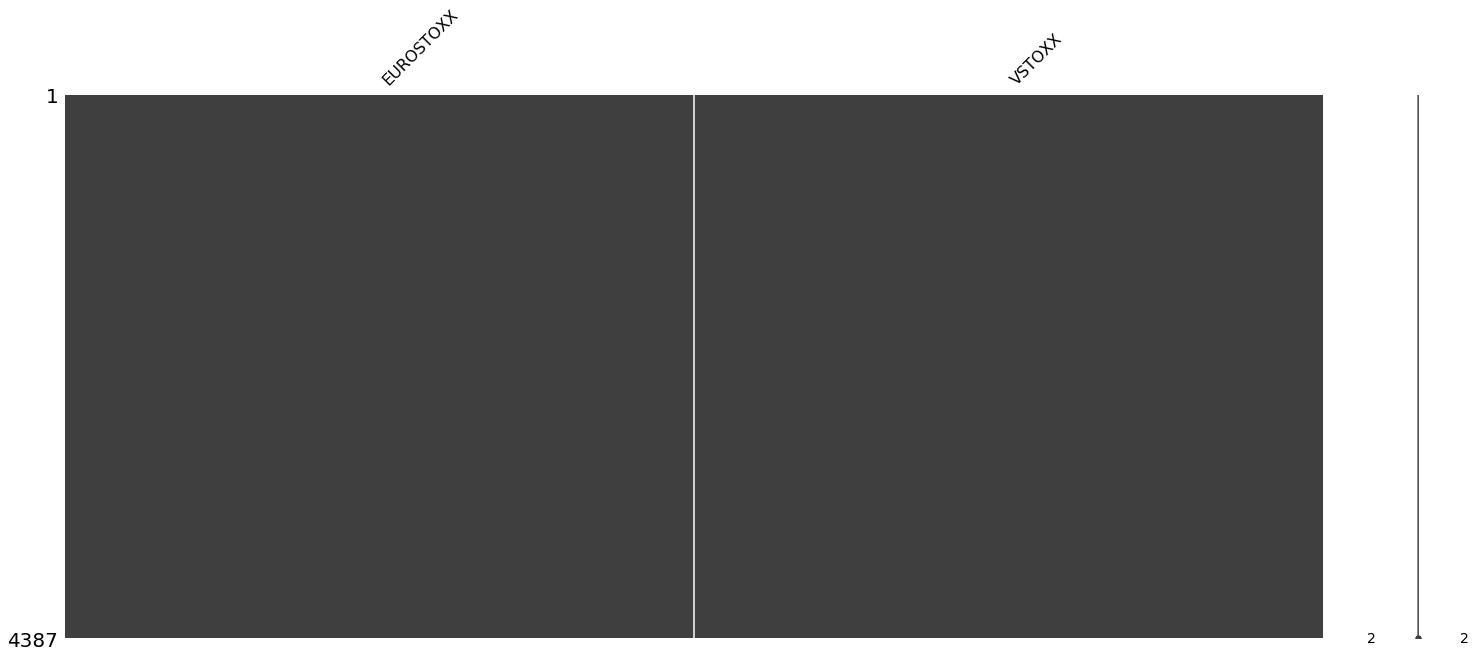

In [176]:
data = data.fillna(method='ffill')
missingno.matrix(data)
data.info()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ca5fc50>,
      dtype=object)

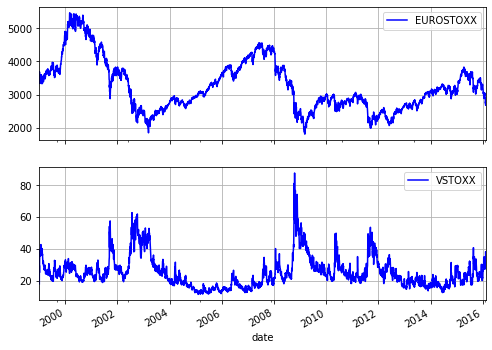

In [178]:
data.plot(subplots=True, grid=True, style='b', figsize=(8,6))

In [181]:
rets = np.log(data / data.shift(1))
rets.head()

,EUROSTOXX,VSTOXX
date,,
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


,EUROSTOXX,VSTOXX
date,,
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570
1999-01-11,-0.019593,0.103173


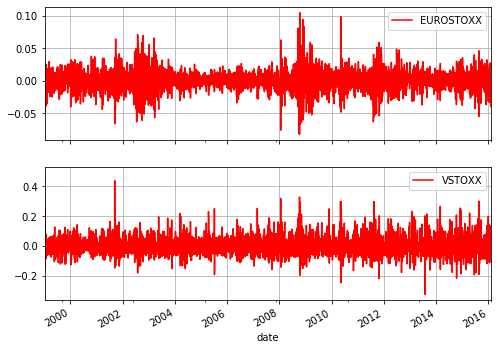

In [186]:
rets.dropna(inplace=True)
rets.plot(subplots=True, grid=True, style='r', figsize=(8,6))
rets.head()

In [190]:
xdat = rets['EUROSTOXX'].values
ydat = rets['VSTOXX'].values
reg = np.polyfit(x=xdat, y=ydat, deg=1) # deg : Degree of the fitting polynomial
reg

array([-2.84605948e+00, -9.50988215e-06])

,EUROSTOXX,VSTOXX
EUROSTOXX,1.00000,-0.73698
VSTOXX,-0.73698,1.00000


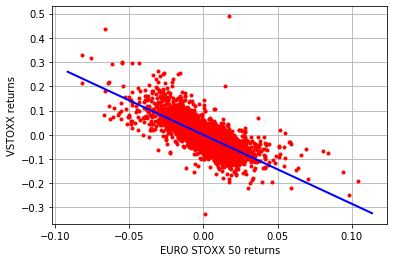

In [198]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1])
plt.plot(x, reg[1] + reg[0] * x, 'b', lw=2.0)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')
rets.corr()

date
1999-01-05         NaN
1999-01-06         NaN
1999-01-07         NaN
1999-01-08         NaN
1999-01-11         NaN
                ...   
2016-02-08   -0.832793
2016-02-09   -0.831793
2016-02-10   -0.830014
2016-02-11   -0.832492
2016-02-12   -0.832799
Length: 4386, dtype: float64

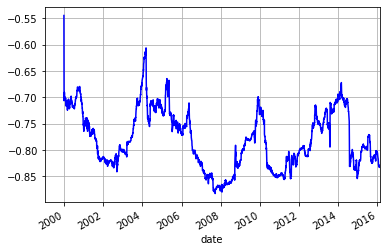

In [215]:
rets['EUROSTOXX'].rolling(252).corr(rets['VSTOXX']).plot(grid=True, style='b')
rets['EUROSTOXX'].rolling(252).corr(rets['VSTOXX'])

In [219]:
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2
year = '2019'
month = '08'
days = ['27','28','29']
NKE = pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(url % (year, month, day),
                                index_col = 0, header = 0, parse_dates = True))
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']
NKE.info()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 2
